# Clase 15

## 1. K-means
• Algoritmo de Aprendizaje No Supervisado

• Algoritmo de Clúster basados en Prototipos

El clustering basado en prototipos significa que cada clúster está representado por un prototipo (un punto), que puede ser, el centroide (media) de puntos similares con características continuas o el medioide (el punto más representativo o más frecuente) en el caso de características categóricas.
K-means es muy bueno en la identificación de clusters con forma esférica, pero uno de los inconvenientes de este algoritmo de clustering es que tenemos que especificar el número de clusters, 𝑘, a priori. Una elección inadecuada de 𝑘 puede dar lugar a un mal rendimiento de la agrupación.

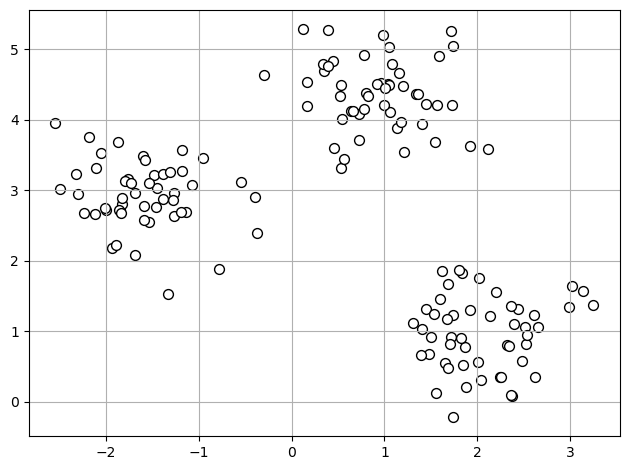

In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,shuffle=True, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

¿A qué elementos hacen referencia cada uno de los atributos utilizados en el algoritmos Kmeans() de sk-learn?

**NOTA: Cuando aplicamos K-means a datos del mundo real utilizando una métrica de distancia euclidiana, debemos asegurarnos de que las características se miden en la misma escala.**

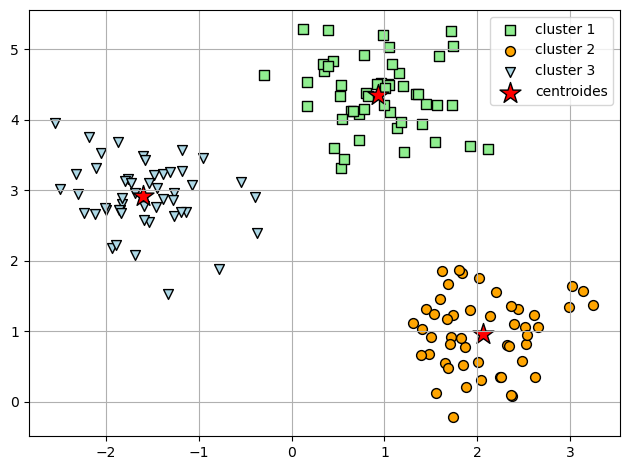

In [9]:
plt.scatter(X[y_km == 0, 0],
X[y_km == 0, 1],
s=50, c='lightgreen',
marker='s', edgecolor='black',
label='cluster 1')
plt.scatter(X[y_km == 1, 0],
X[y_km == 1, 1],
s=50, c='orange',
marker='o', edgecolor='black',
label='cluster 2')
plt.scatter(X[y_km == 2, 0],
X[y_km == 2, 1],
s=50, c='lightblue',
marker='v', edgecolor='black',
label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
km.cluster_centers_[:, 1],
s=250, marker='*',
c='red', edgecolor='black',
label='centroides')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

¿Qué sucede si aumentamos el número de clusters 𝑘?

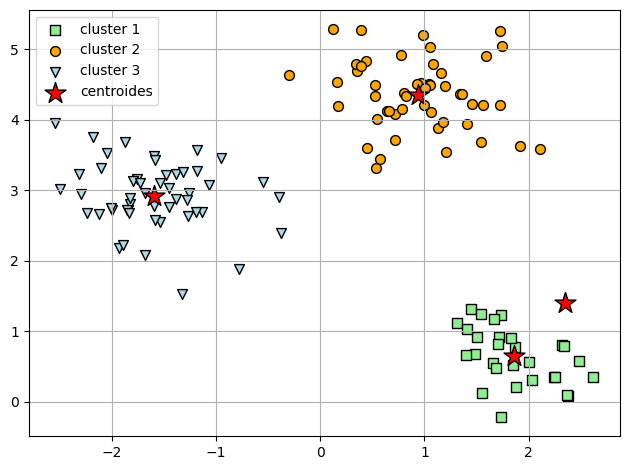

In [10]:
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
X[y_km == 0, 1],
s=50, c='lightgreen',
marker='s', edgecolor='black',
label='cluster 1')
plt.scatter(X[y_km == 1, 0],
X[y_km == 1, 1],
s=50, c='orange',
marker='o', edgecolor='black',
label='cluster 2')
plt.scatter(X[y_km == 2, 0],
X[y_km == 2, 1],
s=50, c='lightblue',
marker='v', edgecolor='black',
label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
km.cluster_centers_[:, 1],
s=250, marker='*',
c='red', edgecolor='black',
label='centroides')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

## 1.2 Una versión mejorada: K-means ++

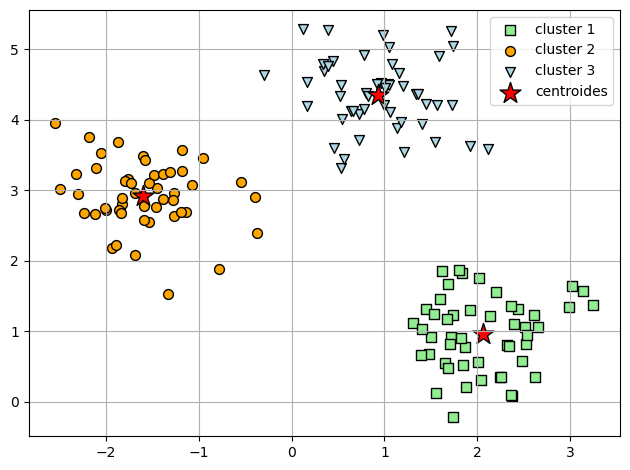

In [11]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km == 0, 0],
X[y_km == 0, 1],
s=50, c='lightgreen',
marker='s', edgecolor='black',
label='cluster 1')
plt.scatter(X[y_km == 1, 0],
X[y_km == 1, 1],
s=50, c='orange',
marker='o', edgecolor='black',
label='cluster 2')
plt.scatter(X[y_km == 2, 0],
X[y_km == 2, 1],
s=50, c='lightblue',
marker='v', edgecolor='black',
label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
km.cluster_centers_[:, 1],
s=250, marker='*',
c='red', edgecolor='black',
label='centroides')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

# 2. Métricas de rendimiento de modelos cluster
## 2.1 Método del Codo
Uno de los principales retos del aprendizaje no supervisado es que no conocemos la respuesta definitiva. No tenemos las etiquetas de clase verdaderas en nuestro conjunto de datos que nos permitan evaluar el rendimiento de un modelo.

Por lo tanto, para cuantificar la calidad de la agrupación, necesitamos utilizar métricas intrínsecas, como la SSE (distorsión) dentro del clúster, para comparar el rendimiento de diferentes agrupaciones de K-means.

In [17]:
print('Distorción: %.2f' % km.inertia_)

Distorción: 72.48


ntuitivamente, podemos decir que, si 𝑘 aumenta, la distorsión disminuirá. Esto se debe a que las muestras estarán más cerca de los centroides a los que están asignadas. La idea que subyace al método del codo es identificar el valor de 𝑘 en el que la distorsión comienza disminuir más
lentamente.

### Método codo

c:\Users\Javiera Carrasco\anaconda3\envs\ima539\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


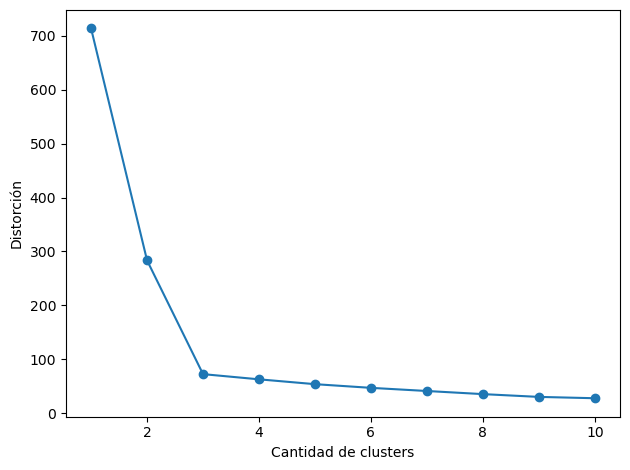

In [13]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Cantidad de clusters')
plt.ylabel('Distorción')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

## 2.1 Gráfico de silueta
El análisis de la silueta puede utilizarse como una herramienta gráfica para trazar una medida de lo estrechamente agrupadas que están las muestras en los clusters (calidad de la agrupación).


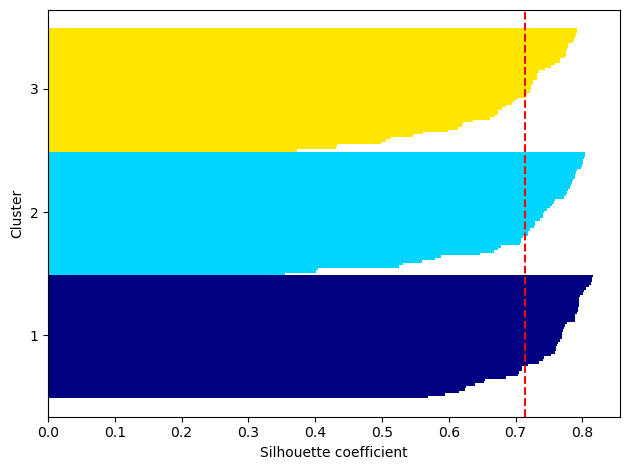

In [14]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
    edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

In [19]:
#Linea roja
silhouette_avg

0.7143417887288687

• El coeficiente de silueta está acotado en el intervalo de -1 a 1.

• El coeficiente de silueta es 0 si la separación y la cohesión de los clusters son iguales (𝑏(𝑖) = 𝑎(𝑖)).

• Además, nos acercamos a un coeficiente de silueta ideal de 1 si 𝑏(𝑖) >> 𝑎(𝑖) , ya que 𝑏(𝑖) cuantifica el grado de disimilitud de una muestra con respecto a otros clusters, y 𝑎(𝑖) nos dice el grado de similitud con las demás muestras de su propio cluster.

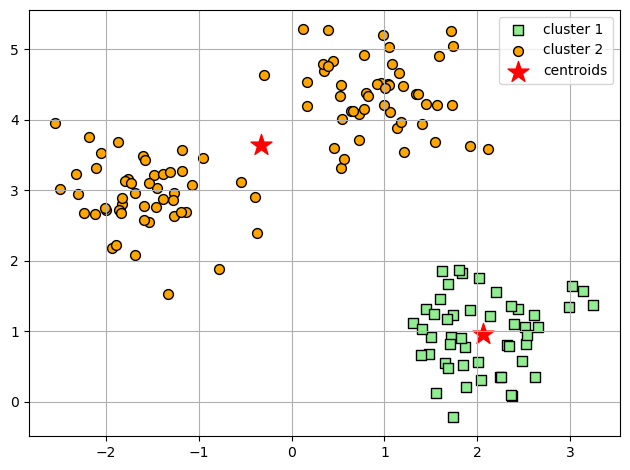

In [18]:
km =KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km == 0, 0],
X[y_km == 0, 1],
s=50,
c='lightgreen',
edgecolor='black',
marker='s',
label='cluster 1')
plt.scatter(X[y_km == 1, 0],
X[y_km == 1, 1],
s=50,
c='orange',
edgecolor='black',
marker='o',
label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_05.png', dpi=300)
plt.show()

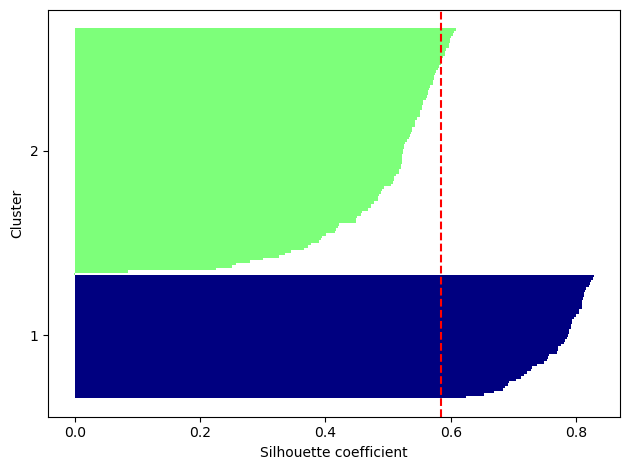

In [20]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
    edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
#plt.savefig('images/11_06.png', dpi=300)
plt.show()

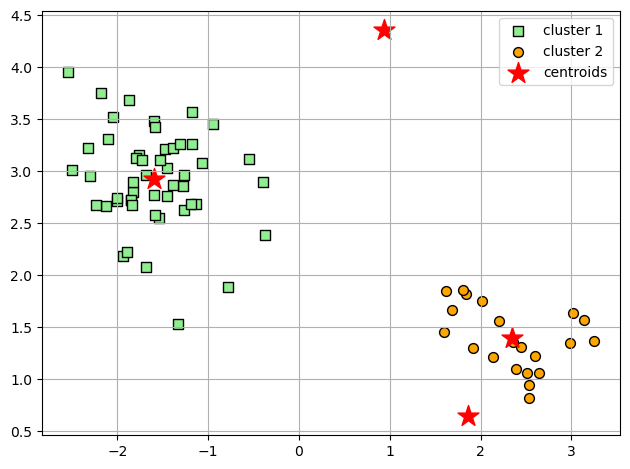

In [21]:
km =KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km == 0, 0],
X[y_km == 0, 1],
s=50,
c='lightgreen',
edgecolor='black',
marker='s',
label='cluster 1')
plt.scatter(X[y_km == 1, 0],
X[y_km == 1, 1],
s=50,
c='orange',
edgecolor='black',
marker='o',
label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_05.png', dpi=300)
plt.show()

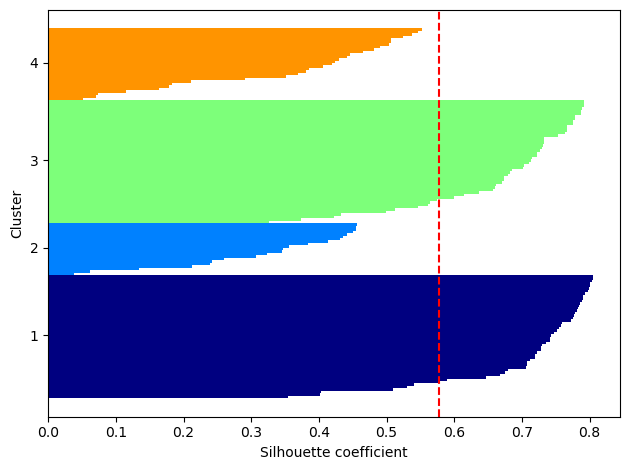

In [23]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,height=1.0,edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
#plt.savefig('images/11_06.png', dpi=300)
plt.show()